Prueba

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
◦	Se tiene los datos de las provincias contigadas por COVID-19, los mismo que se encuentran en el siguiente link (https://public.flourish.studio/visualisation/1631922/?utm_source=showcase&utm_campaign=visualisation/1631922), estos datos estan disponibles en el Avac dentro del apartado Prueba – Practica, con estos datos obtener los siguientes modelos:


In [58]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


In [26]:
# Actualizar los datos (URL)

url = 'Casos covid por provincias.xlsx'

df = pd.read_excel(url)
df

,Provincia,16/3/2020,17/3/2020,18/3/2020,19/3/2020,20/3/2020,21/3/2020,22/3/2020,23/3/2020,24/3/2020,...,13/4/2020,14/4/2020,15/4/2020,16/4/2020,17/4/2020,18/4/2020,19/4/2020,20/4/2020,21/04/2020,22/04/2020
0,Azuay,1.0,5.0,5.0,14.0,18.0,19.0,19.0,23.0,28.0,...,182,192,200,205,207,217,223,232,247,273
1,Bolivar,0.0,0.0,2.0,2.0,4.0,5.0,8.0,9.0,9.0,...,33,33,33,39,39,45,49,54,55,59
2,Cañar,NaN,NaN,NaN,3.0,3.0,3.0,4.0,5.0,7.0,...,100,104,105,117,118,125,137,145,149,162
3,Carchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,26,26,26,26,28,33,35,35,35
4,Chimborazo,NaN,NaN,NaN,2.0,3.0,4.0,9.0,9.0,11.0,...,85,86,90,99,105,108,112,116,121,124
5,Cotopaxi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,42,43,45,46,50,51,54,57,57,59
6,El Oro,NaN,1.0,1.0,1.0,2.0,2.0,6.0,9.0,14.0,...,160,166,183,193,207,247,257,266,276,289
7,Esmeraldas,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,3.0,...,38,41,44,53,85,86,89,102,102,104
8,Galápagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,11,12,11,11,42,53,54,54,54,54
9,Guayas,37.0,81.0,128.0,187.0,318.0,397.0,607.0,769.0,826.0,...,5395,5417,5551,5754,5777,6150,6446,6921,7108,7391


In [27]:
start_date = "16/3/2020"
province = df[df['Provincia'] == "Bolivar"]
infected = province.iloc[0].loc[start_date:]
infected

16/3/2020      0
17/3/2020      0
18/3/2020      2
19/3/2020      2
20/3/2020      4
21/3/2020      5
22/3/2020      8
23/3/2020      9
24/3/2020      9
25/3/2020     11
26/3/2020     11
27/3/2020     12
28/3/2020     14
29/3/2020     14
30/3/2020     14
31/3/2020     15
1/4/2020      20
2/4/2020      26
3/4/2020      26
4/4/2020      26
5/4/2020      27
6/4/2020      27
7/4/2020      27
8/4/2020      27
9/4/2020      30
10/4/2020     32
11/4/2020     33
12/4/2020     33
13/4/2020     33
14/4/2020     33
15/4/2020     33
16/4/2020     39
17/4/2020     39
18/4/2020     45
19/4/2020     49
20/4/2020     54
21/04/2020    55
22/04/2020    59
Name: 1, dtype: object

38

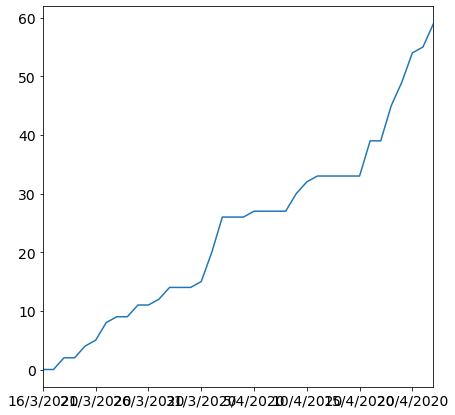

In [28]:
infected.plot(x ='date', y='total_cases')
len(infected)

## LINEAL

In [29]:
x = range(1,len(infected)+1) # Fecha
y = infected
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [1.41973958]
Independent term: 
 -3.9217638691322954


In [30]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[len(infected)+7]])
print(int(y_prediccion))

59


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


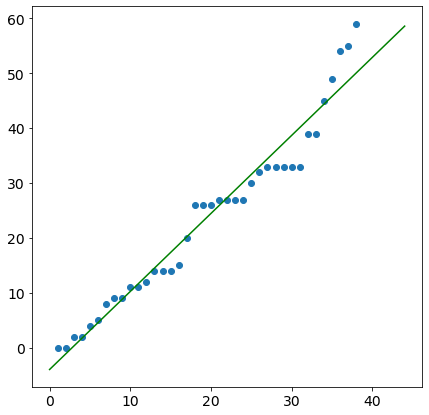

In [31]:
#Graficar
plt.scatter(x, y)
x_real=np.array(range(0, len(infected)+7))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

## Logistico

In [32]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-19.94397257,  16.12994089]), array([[18.77584457, -6.29772319],
       [-6.29772319,  2.32414943]]))


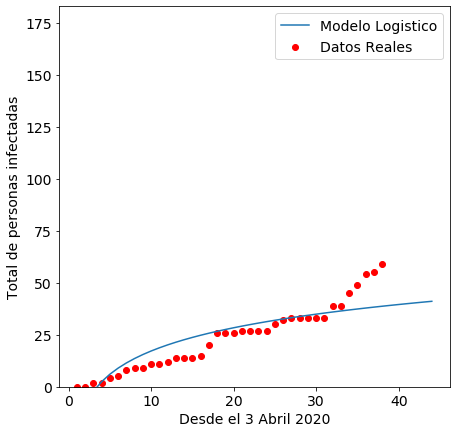

In [33]:
pred_x = list(range(min(x),max(x)+7)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 3 Abril 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

## Exponencial

In [54]:
infected = list(infected)
lista=[]
for i in range(1,len(infected)+1):
    lista.append(i)
n=len(lista)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

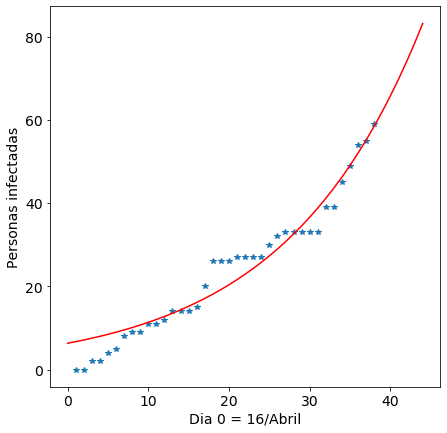

In [85]:
n = len(infected)
x = np.array(range(1,n+1))
y = np.array(infected)

from scipy.optimize import curve_fit
def exponencial (x,a,b):
    return a * np.exp(-b * x-0)

r=curve_fit(exponencial, x, y)
x_pred=np.array(range(0,len(infected)+7))
plt.figure()
plt.plot(x,y,'*',label="Valores reales")
plt.plot(x_pred, [exponencial(i,r[0][0],r[0][1]) for i in x_pred], 'r-', label="Prediccion")
plt.xlabel("Dia 0 = 16/Abril")
plt.ylabel("Personas infectadas")
plt.legend
plt.show()


## Polinomial

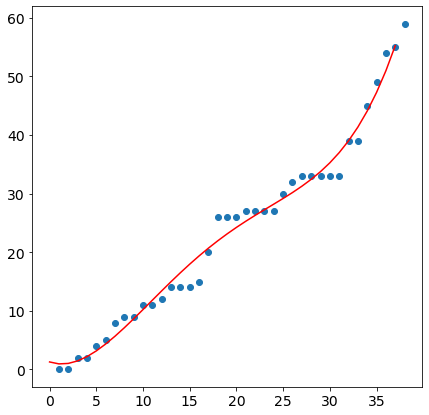

In [118]:
pred={}
for g in range(0,5):
    z = np.polyfit(x, y, g, full=True)
    pred[g]=z
    
xnuevo = np.array(range(0,len(infected)))

for g,predi in pred.items():
    coefs, error, *_ = predi
    p = np.poly1d(coefs)

plt.scatter(x,y)
plt.plot(xnuevo, p(xnuevo),"r-")

## SIR

In [121]:
# Implementar librerias 
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from time import time
import argparse
import sys
import json
import ssl
import urllib.request
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from IPython.display import display

In [ ]:
class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0
        
        
    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        current = current + timedelta(days=9)
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values,
                                          [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values,
                                             [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values,
                                         [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))


    def train(self):
        recovered = 0
        death = self.load_death(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(loss, [0.001, 0.001],
                           args=(data,
                                 recovered,
                                 self.s_0,
                                 self.i_0,
                                 self.r_0),
                           method='L-BFGS-B',
                           bounds=[(0.00000001, 0.7529), (0.00000001, 0.544)])
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Confirmed cases': extended_actual,
                           'Recovered cases': extended_recovered,
                           'Susceptible contagio': prediction.y[0],
                           'Infected': prediction.y[1],
                           'Recovered cases': prediction.y[2]}, index=new_index)
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.set_xlabel('Fechas')
        ax.set_ylabel('Numero de Personas')
        ax.set_ylim(0,N*1.2)
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.set_title(self.country)
        df.plot(ax=ax)
        print("β: "+str(beta))
        print("γ: "+str(gamma))


def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))


def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

N=9899
i0=1
r0=0
s0=N - i0 - r0
print('S:',s0,'\tI:',i0,'\tR:',r0)

learner = Learner('Bolivar', loss, '16/3/2020', 10, s0, i0, r0)
learner.train()